<font size="5"><b>Case Study I</b><br><br>
Module 7: Supervised Learning-1
 </font>

<font color='red'>
    
Case Study<br><br>
Objectives:<br>
• Fit a model using binary classification using logistic regression.<br>
• Identify correlated variables and form a less complex model.<br>


Questions:<br><br>
1. We will use acoustic features to distinguish a male voice from female. Load the
dataset from “voice.csv”, identify the target variable and do a one-hot encoding
for the same. Split the dataset in train-test with 20% of the data kept aside for
testing.
[Hint: Refer to LabelEncoder documentation in scikit-learn]<br><br>
2. Fit a logistic regression model and measure the accuracy on the test set.
[Hint: Refer to Linear Models section in scikit-learn]<br><br>
3. Compute the correlation matrix that describes the dependence between all
predictors and identify the predictors that are highly correlated. Plot the
correlation matrix using seaborn heatmap.
[Hint: Explore dataframe methods to identify appropriate method]<br><br>
4. Based on correlation remove those predictors that are correlated and fit a
logistic regression model again and compare the accuracy with that of
previous model.
[Hint: Identify correlated variable pairs and remove one among them]

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [161]:
data = pd.read_csv('voice.csv')
data.tail(5)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female
3167,0.165509,0.092884,0.183044,0.070072,0.250827,0.180756,1.705029,5.769115,0.938829,0.601529,...,0.165509,0.185607,0.062257,0.271186,0.227022,0.007812,0.554688,0.546875,0.350000,female


In [162]:
data.label=data.label.map({'male':0,'female':1})

In [163]:
x=data.iloc[:,0:20]
y=data.label

1. We will use acoustic features to distinguish a male voice from female. Load the
dataset from “voice.csv”, identify the target variable and do a one-hot encoding
for the same. Split the dataset in train-test with 20% of the data kept aside for
testing.
[Hint: Refer to LabelEncoder documentation in scikit-learn]


In [164]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=5)

2. Fit a logistic regression model and measure the accuracy on the test set.
[Hint: Refer to Linear Models section in scikit-learn]


In [165]:
lg_model = LogisticRegression()

In [166]:
lg_model.fit(train_x,train_y)

y_pred = lg_model.predict(test_x)

C:\Users\Senjuti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [167]:
print(metrics.accuracy_score(test_y,y_pred))

0.9006309148264984


3. Compute the correlation matrix that describes the dependence between all
predictors and identify the predictors that are highly correlated. Plot the
correlation matrix using seaborn heatmap.
[Hint: Explore dataframe methods to identify appropriate method]


In [168]:
deep_copy = data.copy(deep=True)
deep_copy.head(3)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,0
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,0
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,0


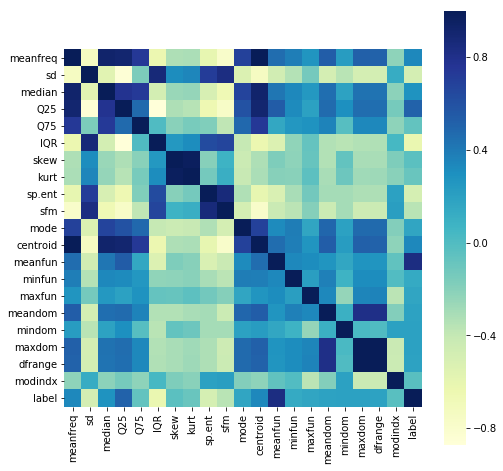

In [180]:
corelation = deep_copy.corr()
plt.figure(figsize=(8,8))
sn.heatmap(corelation,cmap='YlGnBu',square=True)

In [181]:
deep_copy.drop('IQR',axis=1,inplace=True)
#deep_copy.drop('sd',axis=1,inplace=True)
#deep_copy.drop('sp.ent',axis=1,inplace=True)

In [182]:
deep_copy.head(3)

,meanfreq,sd,median,Q25,Q75,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,12.863462,274.402906,0.893369,0.491918,0.0,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,0
1,0.066009,0.067310,0.040229,0.019414,0.092666,22.423285,634.613855,0.892193,0.513724,0.0,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,0
2,0.077316,0.083829,0.036718,0.008701,0.131908,30.757155,1024.927705,0.846389,0.478905,0.0,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,0


In [183]:
x1 = deep_copy.iloc[:,0:17]
y1 = deep_copy.label

In [184]:
x1.head(2)

,meanfreq,sd,median,Q25,Q75,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom
0,0.059781,0.064241,0.032027,0.015071,0.090193,12.863462,274.402906,0.893369,0.491918,0.0,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812
1,0.066009,0.067310,0.040229,0.019414,0.092666,22.423285,634.613855,0.892193,0.513724,0.0,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688


In [185]:
train_x1,test_x1,train_y1,test_y1=train_test_split(x1,y1,test_size=.20,random_state=5)

In [186]:
lg_model_new = LogisticRegression()

lg_model_new.fit(train_x1,train_y1)

y1_pred = lg_model_new.predict(test_x1)

C:\Users\Senjuti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [187]:
print(metrics.accuracy_score(test_y1,y1_pred))

0.8785488958990536
